In [1]:
%matplotlib inline
%load_ext blackcellmagic

# Assignment - Simple Routing Problem

You are given a directed graph between spatial points (fixes -- i.e. named positions with longitude and latitude) in US airspace. Your task is to find the shortest path between **KSFO** and **KJFK** fixes taking into consideration weather activity. 

## INPUT 
- edges.json (directed graph definition), 
- fixes.json (spatial positions of fixes), 
- weather.png (latitude/longitude grid; each pixel coresponds to some area on the map and represents weather activity encoded as colors: yellow/green/lack of color),
- weather.json (a top left and bottom right positions of weather grid on the globe)

## OUTPUT
- List of fixes names - shortest path with weather considered
- Weight of the weather vs distance

## Remarks
- Fix is just a point in space - defined as name and a position `{"KSFO": {"latitude": 37.618805555555554, "longitude": -122.37541666666667}}`
- The cost of traveling between two fixes should be a weighted sum of:
    - distance between points on globe,
    - cost of traveling through a pixel of the weather model.
- Lack of color (100% transparency) means there is no weather activity in that pixel, green means that there is some moderate weather activity, yellow means severe weather activty. You can treat yellow color 2x worst then green color. 
- You should present different solutions coresponding to different weather/distance weight. It means that with lower weight the route generated should be more direct (possible cutting through some weather) and for higher weights route will be possibly longer but avoiding weather as much possible.


## Input data

In [2]:
! head edges.json

[
  [
    "ABQ",
    "ADDVL"
  ],
  [
    "ABQ",
    "AHAMU"
  ],
  [


In [3]:
! head fixes.json

{
  "KSFO": {
    "latitude": 37.618805555555554,
    "longitude": -122.37541666666667
  },
  "KSFO:RW01L": {
    "latitude": 37.60952777777778,
    "longitude": -122.38189722222222
  },
  "KSFO:RW10R": {


In [4]:
import json
fixes = json.load(open('fixes.json'))
edges = json.load(open('edges.json'))
print(f"Loaded {len(edges)} edges and {len(fixes)} fixes.")

Loaded 116108 edges and 1103 fixes.


In [5]:
fixes['KSFO']

{'latitude': 37.618805555555554, 'longitude': -122.37541666666667}

In [6]:
edges[:10]

[['ABQ', 'ADDVL'],
 ['ABQ', 'AHAMU'],
 ['ABQ', 'AKO'],
 ['ABQ', 'ALS'],
 ['ABQ', 'ANTHY'],
 ['ABQ', 'ANY'],
 ['ABQ', 'ASYLM'],
 ['ABQ', 'ATS'],
 ['ABQ', 'AUTIM'],
 ['ABQ', 'AVVVS']]

### Visualisation of a random sample of graph edges
*Graph is too big to display it without sampling. Visualisation might work only on Safari, because Chrome is not allowing for so big iframe's.*

In [7]:
import folium
from random import shuffle

fixes_random = list(fixes.keys())
shuffle(fixes_random)
fixes_random = set(fixes_random[:100])

shuffle(edges)
m = folium.Map(location=[40, -98], zoom_start=4)
for edge in edges:
    a, b = edge
    if a in fixes_random:
        folium.PolyLine(
            [
                (fixes[a]["latitude"], fixes[a]["longitude"]),
                (fixes[b]["latitude"], fixes[b]["longitude"]),
            ],
            weight=0.3,
        ).add_to(m)

folium.Marker(
    (fixes["KSFO"]["latitude"], fixes["KSFO"]["longitude"]), tooltip="KSFO"
).add_to(m)
folium.Marker(
    (fixes["KJFK"]["latitude"], fixes["KJFK"]["longitude"]), tooltip="KJFK"
).add_to(m)

points = ['KSFO',
 'KSFO:RW28L',
 'ORYAN',
 'SAHEY',
 'MAAYS',
 'MCOVY',
 'SUSEY',
 'VNY',
 'JANAD',
 'PERRO',
 'FANNY',
 'CAGAD',
 'TIYUR',
 'PLESS',
 'AUGUS',
 'CAGED',
 'JFK',
 'KJFK']

for i in points:
    folium.Marker(
    (fixes[i]["latitude"], fixes[i]["longitude"]), tooltip= i
).add_to(m)

m

### Visualisation of a weather layer

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image
import numpy as np

weather_matrix = matplotlib.image.imread('weather.png')
weather_matrix.shape

(1280, 1792, 4)

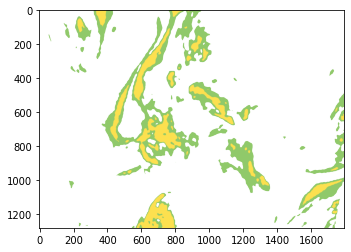

In [9]:
plt.imshow(weather_matrix)

In [10]:
weather_coordinates = json.load(open('weather.json'))
weather_coordinates

{'top_left': {'latitude': 55.78, 'longitude': -135.0},
 'bottom_right': {'latitude': 21.94, 'longitude': -67.5}}

In [19]:
m = folium.Map(location=[40, -98], zoom_start=4)
folium.Marker(
    (
        weather_coordinates["bottom_right"]["latitude"],
        weather_coordinates["bottom_right"]["longitude"],
    ),
    tooltip="bottom-right",
).add_to(m)
folium.Marker(
    (
        weather_coordinates["top_left"]["latitude"],
        weather_coordinates["top_left"]["longitude"],
    ),
    tooltip="top-left",
).add_to(m)
folium.raster_layers.ImageOverlay(
    weather_matrix,
    pixelated=True,
    mercator_project=True,
    bounds=[
        [
            weather_coordinates["bottom_right"]["latitude"],
            weather_coordinates["top_left"]["longitude"],
        ],
        [
            weather_coordinates["top_left"]["latitude"],
            weather_coordinates["bottom_right"]["longitude"],
        ],
    ],
).add_to(m)

x_array = np.arange(weather_coordinates["bottom_right"]["latitude"], weather_coordinates["top_left"]["latitude"], (weather_coordinates["bottom_right"]["latitude"] -  weather_coordinates["top_left"]["latitude"])/5. )
y_array = np.arange(weather_coordinates["bottom_right"]["longitude"], weather_coordinates["top_left"]["longitude"], (weather_coordinates["bottom_right"]["longitude"] -  weather_coordinates["top_left"]["longitude"])/5. )


#folium.Marker(
#    (fixes["ZUVKU"]["latitude"], fixes["ZUVKU"]["longitude"]), tooltip="ZUVKU"
#).add_to(m)
#folium.Marker(
#    (fixes["ZORUN"]["latitude"], fixes["ZORUN"]["longitude"]), tooltip="ZORUN"
#).add_to(m)
points = ['KSFO',
 'KSFO:RW28L',
 'ORYAN',
 'SAHEY',
 'MAAYS',
 'MCOVY',
 'SUSEY',
 'VNY',
 'JANAD',
 'PERRO',
 'FANNY',
 'CAGAD',
 'TIYUR',
 'PLESS',
 'AUGUS',
 'CAGED',
 'JFK',
 'KJFK']

for i in range(0, 5):
    folium.Marker(
    ( weather_coordinates["top_left"]["latitude"] - 5*i , weather_coordinates["top_left"]["longitude"] ), tooltip= i
).add_to(m)
    
m


In [12]:
print("check")

check
